#1.1 Installing pycaret

In [ ]:
!pip install -q pycaret

#1.3 Displaying Interactive Visuals on Google Colab




In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


#5.0 Getting the Data

In [ ]:
# Importing data using pandas
import pandas as pd

# Initializing the white wine dataset from the wine-quality-white.csv file, seperating it on ';' 
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


#Data withheld from original dataset
Not to be confused with train/test split. This particular split is performed to simulate a real life scenario.

In [ ]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))


Data for Modeling: (4408, 12)
Unseen Data For Predictions: (490, 12)


#6.0 Setting up Environment in PyCaret

In [ ]:
from pycaret.regression import *
exp_reg101 = setup(data = data, target = 'alcohol', session_id=123) 

,Description,Value
0,session_id,123
1,Target,alcohol
2,Original Data,"(4408, 12)"
3,Missing Values,False
4,Numeric Features,10
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3085, 17)"


#7.0 Comparing All Models

In [ ]:
best = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.2491,0.1151,0.3378,0.9231,0.0291,0.0237,0.101
rf,Random Forest Regressor,0.2563,0.1358,0.3673,0.9091,0.0315,0.0242,1.228
et,Extra Trees Regressor,0.2421,0.1376,0.3694,0.9079,0.0317,0.0229,0.799
lr,Linear Regression,0.2827,0.1390,0.3710,0.9070,0.0332,0.0272,0.222
br,Bayesian Ridge,0.2827,0.1390,0.3710,0.9070,0.0332,0.0272,0.013
lar,Least Angle Regression,0.2908,0.1506,0.3846,0.8998,0.0347,0.0281,0.014
gbr,Gradient Boosting Regressor,0.3052,0.1604,0.3992,0.8927,0.0346,0.0292,0.316
dt,Decision Tree Regressor,0.3196,0.2571,0.5056,0.8278,0.0435,0.0302,0.028
ada,AdaBoost Regressor,0.4714,0.3272,0.5715,0.7809,0.0503,0.0460,0.194
omp,Orthogonal Matching Pursuit,0.5792,0.5334,0.7295,0.6430,0.0634,0.0553,0.012


#8.0 Create a Model

In [ ]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.2695,0.1362,0.3690,0.9056,0.0318,0.0255
1,0.2508,0.1119,0.3345,0.9233,0.0286,0.0237
2,0.2498,0.1151,0.3393,0.9268,0.0295,0.0239
3,0.2743,0.1295,0.3598,0.9082,0.0311,0.0262
4,0.2598,0.1627,0.4034,0.9024,0.0340,0.0244
5,0.2660,0.1242,0.3524,0.9162,0.0306,0.0254
6,0.2258,0.0892,0.2987,0.9352,0.0260,0.0214
7,0.2310,0.0952,0.3085,0.9378,0.0271,0.0222
8,0.2288,0.0959,0.3096,0.9342,0.0265,0.0216
9,0.2354,0.0917,0.3027,0.9412,0.0258,0.0223


#9.0 Tune a model

In [ ]:
lgbm_params = {'num_leaves': np.arange(10,200,10),
                        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                        'learning_rate': np.arange(0.1,1,0.1)
                        }
tuned_lightgbm = tune_model(lightgbm, custom_grid = lgbm_params)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.2526,0.1348,0.3671,0.9066,0.0315,0.0237
1,0.2257,0.1008,0.3175,0.9309,0.0271,0.0212
2,0.2278,0.1068,0.3267,0.9321,0.0284,0.0217
3,0.2614,0.1254,0.3541,0.9111,0.0304,0.0248
4,0.2489,0.1578,0.3973,0.9053,0.0333,0.0232
5,0.2436,0.1165,0.3413,0.9214,0.0294,0.0231
6,0.2051,0.0825,0.2873,0.9401,0.0247,0.0193
7,0.1976,0.0884,0.2974,0.9422,0.0259,0.0189
8,0.2177,0.0970,0.3114,0.9334,0.0266,0.0206
9,0.2076,0.0830,0.2880,0.9468,0.0244,0.0196


In [ ]:
print(tuned_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


#10.0 Plot a Model

**10.1 Residual Plot**


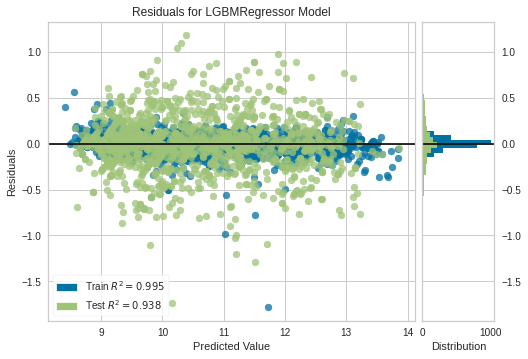

In [ ]:
plot_model(tuned_lightgbm)

**10.2 Prediction Error Plot**




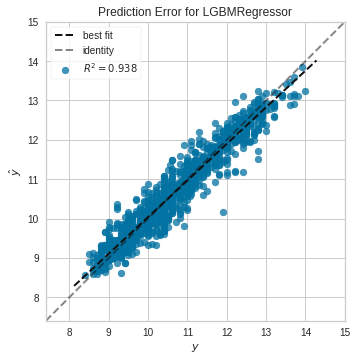

In [ ]:
plot_model(tuned_lightgbm, plot = 'error')

**10.3 Feature Importance Plot**

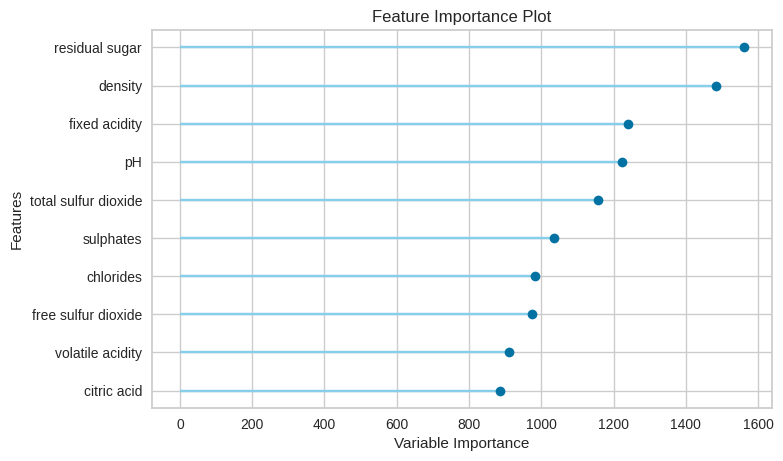

In [ ]:
plot_model(tuned_lightgbm, plot='feature')

In [ ]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#11.0 Predict on Test / Hold-out Sample

In [ ]:
predict_model(tuned_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.2128,0.0925,0.3041,0.938,0.0262,0.0202


# 12.0 Finalize Model for Deployment

In [ ]:
# Fits the model onto the complete dataset including the test/hold-out sample (30% in this case)
# The purpose of this function is to train the model on the complete dataset before it is deployed in production. 
final_lightgbm = finalize_model(tuned_lightgbm)

print(final_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


# 13.0 Predict on Unseen Data

In [ ]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Label
0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,10.172907
1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,9.031585
2,8.6,0.23,0.40,4.2,0.035,17.0,109.0,0.9947,3.14,0.53,9.7,5,10.273084
3,6.6,0.16,0.40,1.5,0.044,48.0,143.0,0.9912,3.54,0.52,12.4,7,11.719209
4,7.4,0.34,0.42,1.1,0.033,17.0,171.0,0.9917,3.12,0.53,11.3,6,11.078610


In [ ]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.alcohol, unseen_predictions.Label, 'R2')

0.9465

# 14.0 Saving the Model

In [ ]:
save_model(final_lightgbm,'Final White Wine LightGBM Model 11Dec2021')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='alcohol',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                  LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=60,
                                min_child_samples=20, min_child_weight=0.001,
                  

# 15.0 Loading the Saved Model

In [ ]:
# Loading the Saved Model 
saved_final_lightgbm = load_model('Final White Wine LightGBM Model 11Dec2021')


Transformation Pipeline and Model Successfully Loaded


In [ ]:
# Predict any new data using the same predict_model() function. 
# Applied the loaded model to predict the same data_unseen that was used above (Section 13)
new_prediction = predict_model(saved_final_lightgbm, data=data_unseen)
new_prediction.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Label
0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,10.172907
1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,9.031585
2,8.6,0.23,0.40,4.2,0.035,17.0,109.0,0.9947,3.14,0.53,9.7,5,10.273084
3,6.6,0.16,0.40,1.5,0.044,48.0,143.0,0.9912,3.54,0.52,12.4,7,11.719209
4,7.4,0.34,0.42,1.1,0.033,17.0,171.0,0.9917,3.12,0.53,11.3,6,11.078610


In [ ]:
check_metric(new_prediction.alcohol, new_prediction.Label, 'R2')

0.9465